SCENE RECOGNITION WITH DEFAULT IMAGES

In [1]:
import os
from my_utils import compute_histogram, create_bag_of_words, extract_sift_features, get_labeled_images
from metrics import get_metrics
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

data_path = './data'
categories = os.listdir(data_path)
print('Categories: ', categories)

images, labels = get_labeled_images(categories, data_path)
print('Quantity of images: ', len(images))

images_train, images_test, labels_train, labels_test = train_test_split(images, labels, test_size=0.2, random_state=42)

all_features = []
for image in images_train:
    features = extract_sift_features(image)
    if features is not None:
        all_features.extend(features)

all_features = np.array(all_features)

num_clusters = 100
kmeans = create_bag_of_words(all_features, num_clusters)

train_histograms = []
for image in images_train:
    histogram = compute_histogram(image, kmeans)
    if histogram is not None:
        train_histograms.append(histogram)

svm_classifier = SVC()
svm_classifier.fit(train_histograms, labels_train)

test_histograms = []
for image in images_test:
    histogram = compute_histogram(image, kmeans)
    if histogram is not None:
        test_histograms.append(histogram)

train_predictions = svm_classifier.predict(train_histograms)
test_predictions = svm_classifier.predict(test_histograms)

get_metrics('Train', labels_train, train_predictions)
get_metrics("Test", labels_test, test_predictions)

Categories:  ['airplanes', 'binocular', 'camera', 'cup', 'headphone', 'lamp', 'pizza', 'strawberry', 'sunflower', 'umbrella']
Quantity of images:  1291

Train prediction accuracy: 86.34%
Train precision score: 0.8818654618130695
Train recall score: 0.8633720930232558
Train F1 score: 0.8450992254289525
Train confusion matrix:
[[629   0   0   0   0   0   1   0   0   0]
 [ 17   9   0   0   0   0   0   0   0   0]
 [ 23   0  14   0   0   0   0   0   0   0]
 [ 22   0   0  24   0   0   2   0   1   1]
 [ 11   0   0   0  24   0   0   0   0   0]
 [ 28   0   0   0   0  16   1   0   1   3]
 [  6   0   0   0   0   0  34   0   1   0]
 [  0   0   0   0   0   0   0  31   0   1]
 [  2   0   0   0   0   0   2   1  65   0]
 [ 14   0   0   0   0   0   3   0   0  45]]

Test prediction accuracy: 80.69%
Test precision score: 0.7889282532139674
Test recall score: 0.806949806949807
Test F1 score: 0.7512734195683505
Test confusion matrix:
[[169   0   0   0   0   0   1   0   0   0]
 [  6   1   0   0   0   0   0 

SCENE RECOGNITION WITH FILTERED IMAGES

Filter Sigma:  6
Categories:  ['airplanes', 'binocular', 'camera', 'cup', 'headphone', 'lamp', 'pizza', 'strawberry', 'sunflower', 'umbrella']
Quantity of images:  1291

Test prediction accuracy: 7.72%
Test precision score: 0.3855353611451173
Test recall score: 0.07722007722007722
Test F1 score: 0.05552873506541461
Test confusion matrix:
[[  7   0   0   0   0   0   0   0   0 163]
 [  1   0   0   0   0   0   0   0   0   6]
 [  0   0   0   0   0   0   0   0   0  13]
 [  0   0   0   0   0   0   0   0   0   7]
 [  0   0   0   0   0   0   0   0   0   7]
 [  0   0   0   0   0   0   0   0   0  12]
 [  4   0   0   0   0   0   0   1   0   7]
 [  0   0   0   0   0   0   0   0   0   3]
 [  0   0   0   0   0   0   0   0   0  15]
 [  0   0   0   0   0   0   0   0   0  13]]


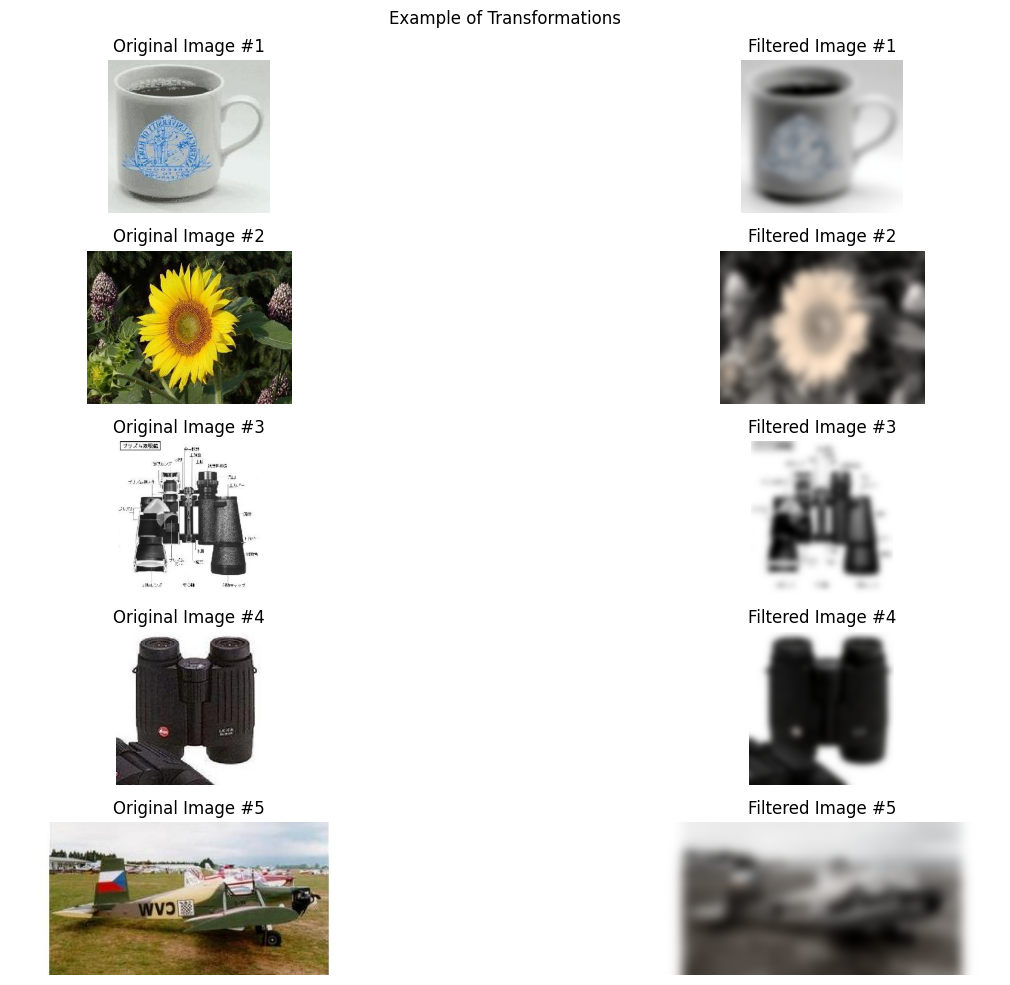

In [3]:
import os
import cv2
import numpy as np
from metrics import get_metrics
from my_utils import compute_histogram, create_bag_of_words, extract_sift_features, get_labeled_images
from sklearn.svm import SVC
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from skimage import filters
import warnings
warnings.filterwarnings('ignore')

filter_sigma = 6
data_path = './data'
categories = os.listdir(data_path)
print('Filter Sigma: ', filter_sigma)
print('Categories: ', categories)

images, labels = get_labeled_images(categories, data_path)
print('Quantity of images: ', len(images))

images_train, images_test, labels_train, labels_test = train_test_split(images, labels, test_size=0.2, random_state=42)

all_features = []
for image in images_train:
    features = extract_sift_features(image)
    if features is not None:
        all_features.extend(features)

all_features = np.array(all_features)

num_clusters = 100
kmeans = create_bag_of_words(all_features, num_clusters)

train_histograms = []
for image in images_train:
    histogram = compute_histogram(image, kmeans)
    if histogram is not None:
        train_histograms.append(histogram)

svm_classifier = SVC()
svm_classifier.fit(train_histograms, labels_train)

test_histograms = []
for image in images_test:
    filtered_image = filters.gaussian(image, filter_sigma)
    filtered_image = cv2.normalize(filtered_image, dst=None, alpha=0, beta=255,norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    histogram = compute_histogram(filtered_image, kmeans)
    if histogram is not None:
        test_histograms.append(histogram)

predictions = svm_classifier.predict(test_histograms)

get_metrics('Test', labels_test, predictions)

fig, ax = plt.subplots(5, 2, figsize=(15, 10), sharex=False, sharey=False, squeeze=False)

fig.suptitle('Example of Transformations')
for i in range(5):
    ax[i][0].imshow(cv2.cvtColor(images_test[i], cv2.COLOR_BGR2RGB))
    ax[i][0].set_title('Original Image #'+str(i+1))
    filtered_image = filters.gaussian(images_test[i], filter_sigma)
    filtered_image = cv2.normalize(filtered_image, dst=None, alpha=0, beta=255,norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    ax[i][1].imshow(cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB))
    ax[i][1].set_title('Filtered Image #'+str(i+1))
    ax[i][0].set_axis_off()
    ax[i][1].set_axis_off()

plt.tight_layout()
plt.show()